In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
train_data=X_train.join(Y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8331,-118.30,33.93,36.0,2196.0,633.0,2017.0,583.0,1.3962,<1H OCEAN,124300.0
1561,-121.96,37.76,8.0,3865.0,463.0,1548.0,432.0,9.7037,<1H OCEAN,425100.0
12312,-116.48,33.61,8.0,1294.0,272.0,457.0,199.0,2.9167,INLAND,115300.0
6936,-118.09,34.00,36.0,1722.0,353.0,1174.0,335.0,3.0450,<1H OCEAN,160600.0
7884,-118.13,33.87,20.0,3638.0,868.0,2326.0,822.0,3.3304,<1H OCEAN,194600.0
...,...,...,...,...,...,...,...,...,...,...
5920,-118.45,34.28,36.0,2602.0,638.0,2780.0,620.0,2.7155,<1H OCEAN,149800.0
3495,-118.47,34.27,35.0,1150.0,185.0,741.0,178.0,5.7410,<1H OCEAN,220600.0
18033,-121.94,37.24,26.0,2561.0,388.0,1165.0,393.0,7.3522,<1H OCEAN,363800.0
18976,-122.03,38.25,13.0,3334.0,541.0,1923.0,538.0,4.0905,INLAND,134800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

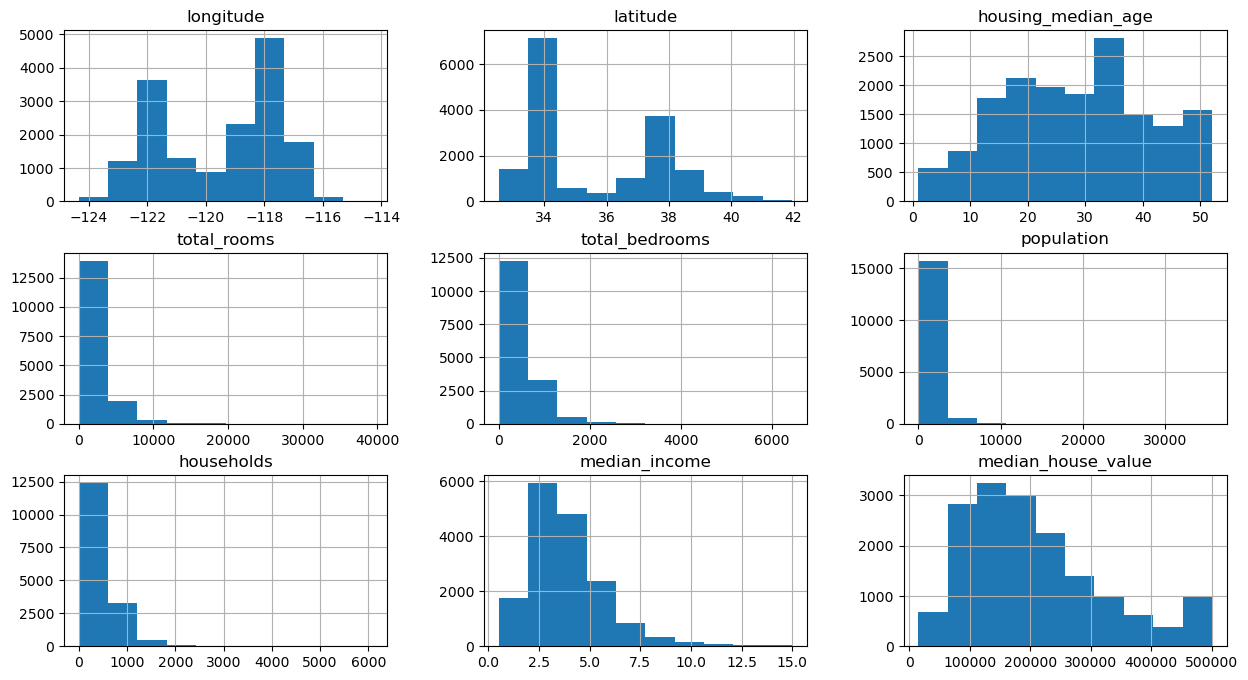

In [20]:
train_data.hist(figsize=(15,8))

<Axes: >

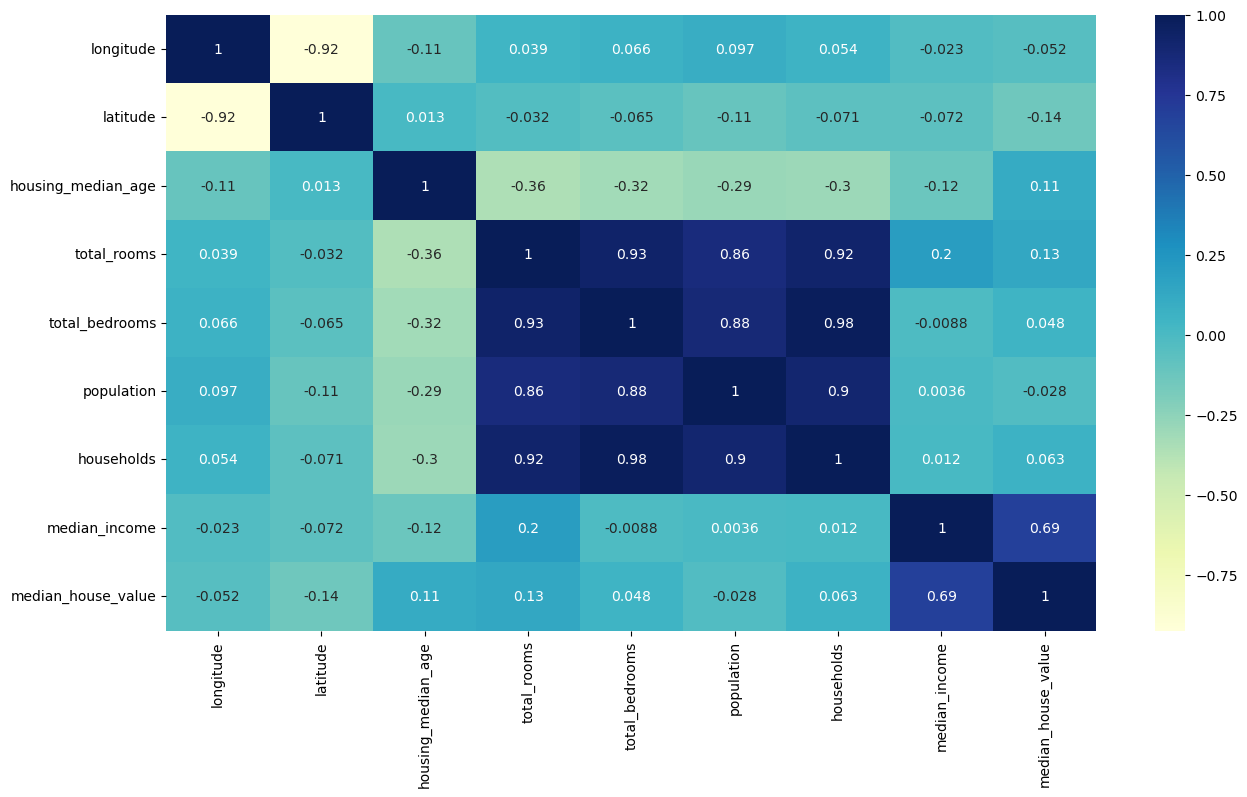

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

In [27]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

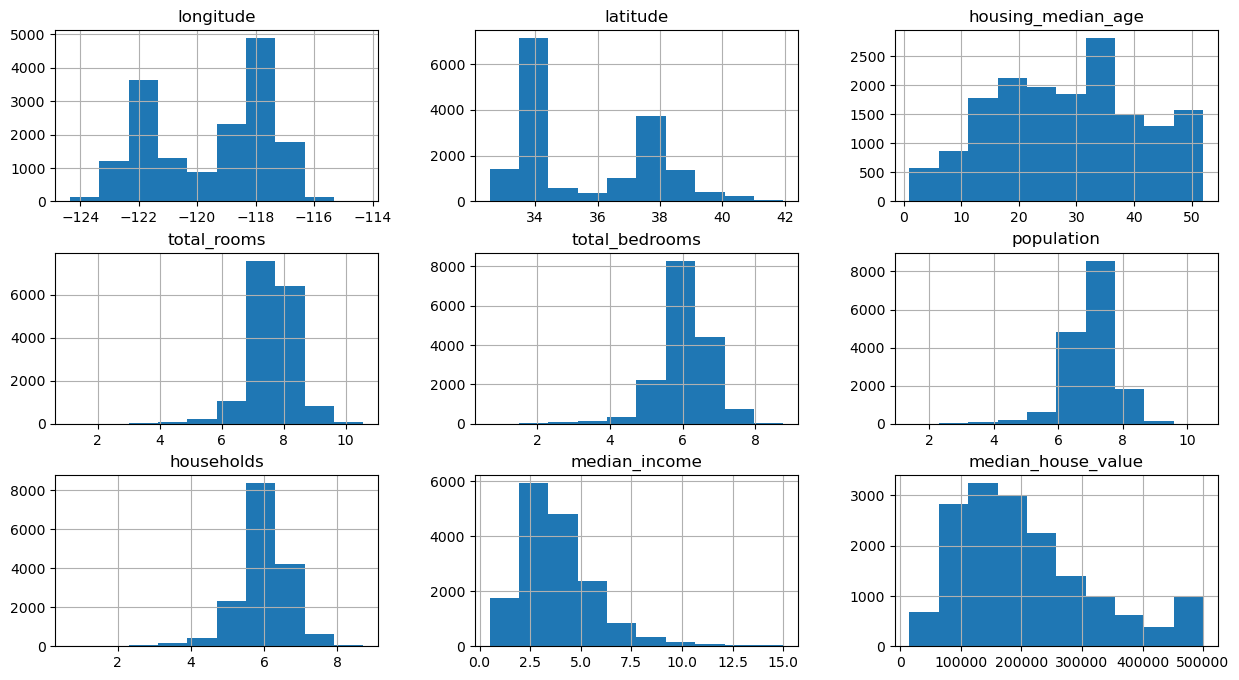

In [28]:
train_data.hist(figsize=(15,8))

In [29]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7241
INLAND        5173
NEAR OCEAN    2117
NEAR BAY      1811
ISLAND           4
Name: count, dtype: int64

In [33]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

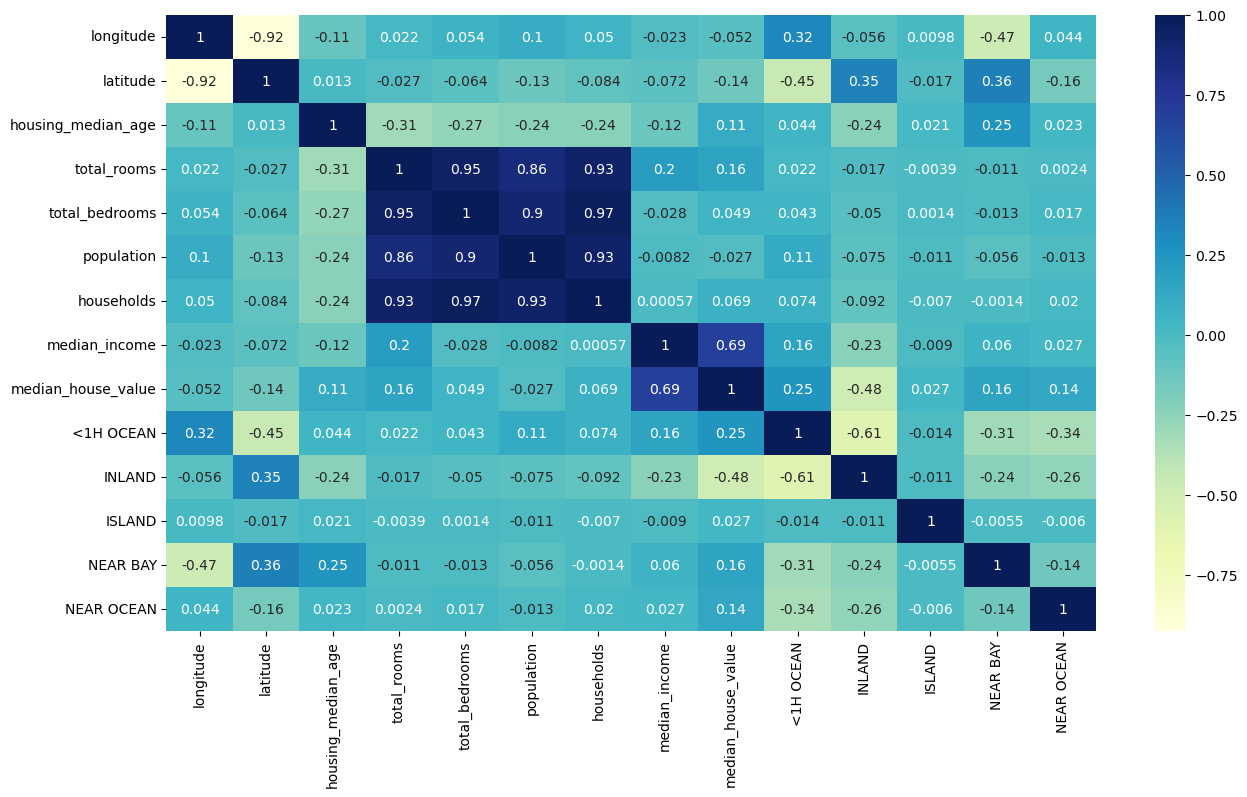

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

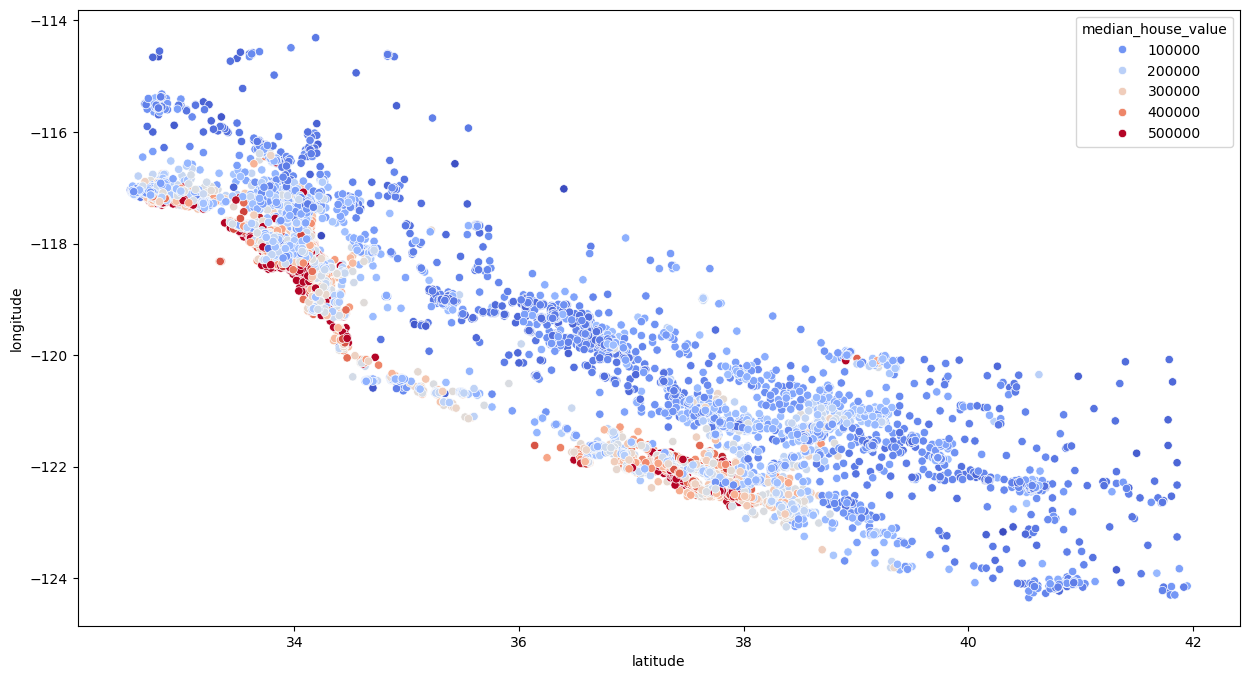

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [38]:
train_data['bedroom_ration']=train_data['total_bedrooms']/train_data['total_rooms']

In [40]:
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

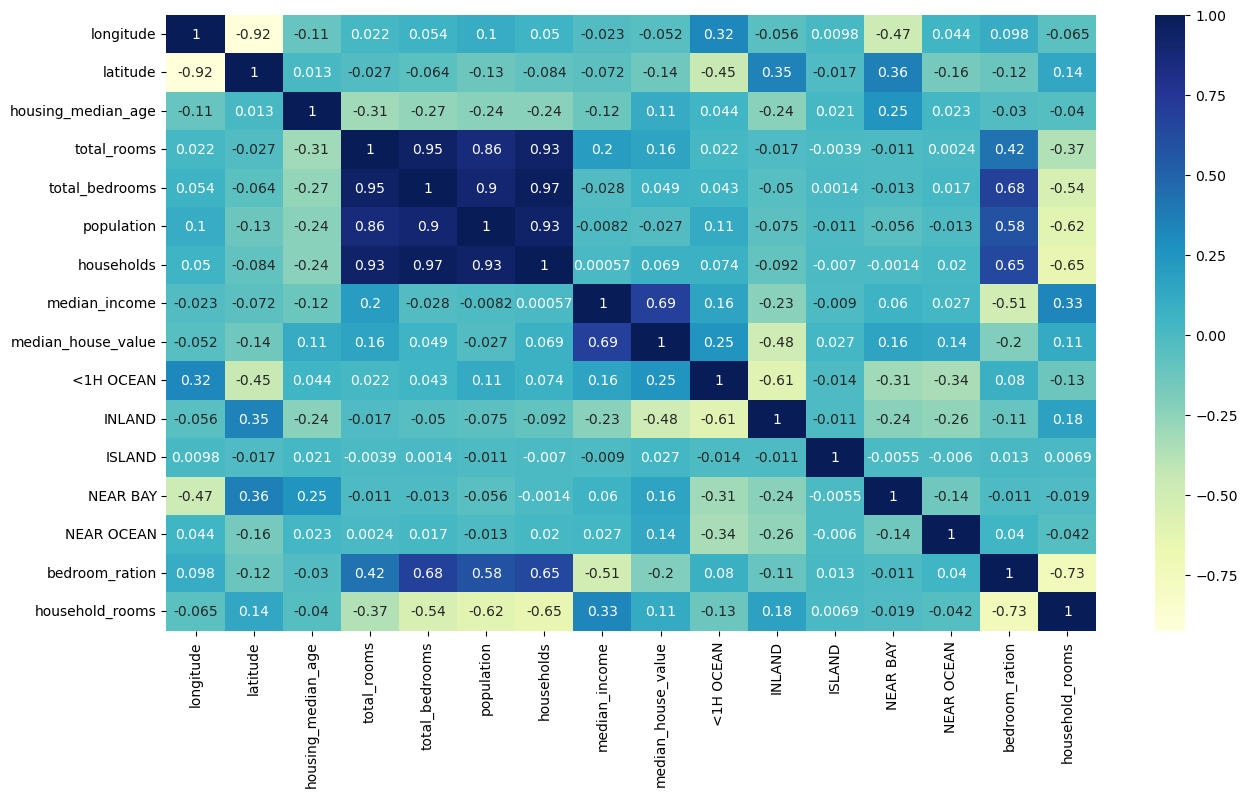

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)
reg= LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [44]:
test_data=X_test.join(Y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ration']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [45]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [50]:
x_test_s=scaler.fit_transform(x_test)

In [51]:
reg.score(x_test_s,y_test)

0.6645885423589017

In [59]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [60]:
forest.score(x_test_s,y_test)

0.7905046853823243

In [ ]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()
param_grid=  {
    "n_estimators":[30,50,100],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(x_train_s, y_train)

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s,y_test)